<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-05-07 14:07:54
-------------------
qualified stocks: 97
with latest results: 90
still star stocks: 48
-------------------
Initial Investment:  1.14 C
CY Investment:  1.41 C
Reserve:  2.11 L
Current:  1.23 C
-------------------
Today PnL: 64.64 K (0.53%)
Current PnL: -21.41 L (-15.18%)
CY Booked + Current PnL: -19.40 L (-13.75%)
-------------------
Total profit:  3.72 L
Total loss:  -25.13 L
-------------------
Total Booked + Current PnL: 7.58 L (6.65%)
Total Booked PnL: 28.99 L (25.42%)
Curr Year Booked PnL: 2.01 L (1.63%)
Prev Year Booked PnL: 26.98 L (23.66%)
Est FTT:  2.06 C
Est FTT PnL: 82.29 L (66.71%)
-------------------
Est LTT:  2.67 C
Est LTT PnL: 1.43 C (116.27%)
Deployed:  1.14 C
Current:  1.23 C
CAGR/XIRR %: 5.72%


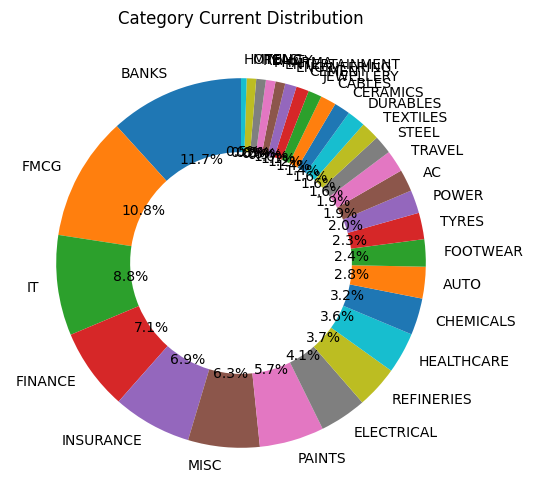

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
34,HDFCBANK,1561.04,2170.00,4.17,X-LC,75.26,102794.0,20059.0,12212.0,0.40,...,11.88,39.01,4.0,175.0,1.64,0.85,35.82,X40,BTT,BANKS
73,SBILIFE,1496.49,1924.99,-1.29,H-LC,89.69,146723.0,21018.0,14980.0,1.20,...,10.21,28.63,NaN,116.0,1.40,1.21,30.71,AR,ATH,INSURANCE
60,PIDILITIND,2504.06,3576.00,-14.47,X-LC,40.21,89289.0,14167.0,17992.0,-0.94,...,20.15,42.81,10.0,66.0,0.79,0.74,11.98,X40,BTT,CHEMICALS
55,MRF,113820.50,150504.12,21.99,X-MC,98.97,280570.0,52929.0,20425.0,3.92,...,7.28,32.23,NaN,203.0,2.59,2.31,36.65,AR,ATH,TYRES
35,HDFCLIFE,562.05,897.00,-5.01,H-LC,67.01,90556.0,20300.0,21570.0,0.26,...,23.82,59.59,16.0,185.0,0.94,0.75,36.01,X40,BTT,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,RBLBANK,230.61,388.00,32.03,M-SC,87.63,204368.0,-29932.0,189837.0,2.01,...,92.89,68.25,-48.0,207.0,-0.16,1.69,34.58,XY24,NTT,BANKS
69,SAIL,130.64,228.00,72.16,M-MC,64.95,196067.0,-28895.0,196557.0,2.05,...,100.25,74.53,-18.0,205.0,-0.15,1.62,13.84,XY24,BTT,STEEL
67,REPCOHOME,515.07,880.00,-59.76,H-SC,74.23,149489.0,-55509.0,200749.0,-0.16,...,134.29,70.85,-44.0,112.0,-0.28,1.23,20.67,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-38.37,H-SC,70.10,184649.0,-63881.0,279355.0,1.10,...,151.29,86.70,-29.0,13.0,-0.23,1.52,22.15,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,118.75,H-SC,21.65,117836.0,-69096.0,150276.0,-1.11,...,127.53,43.43,20.0,164.0,-0.46,0.97,12.73,X40N,BTT,FINANCE
2,ABB,5319.37,8953.12,-40.55,H-LC,69.07,135000.0,2016.0,88830.0,1.24,...,65.80,68.31,NaN,3.0,0.02,1.11,10.08,AR,ATH,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,3.60,M-LC,93.81,182826.0,31620.0,34042.0,1.04,...,18.62,43.43,NaN,45.0,0.93,1.51,26.73,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-18.14,X-SC,36.60,73100.0,-27863.0,123305.0,0.24,...,168.68,94.53,-59.0,67.0,-0.23,0.60,8.38,SR,ATH,CHEMICALS
6,ANGELONE,2328.67,3033.00,-6.41,H-SC,72.16,152652.0,1288.0,44498.0,2.14,...,29.15,30.25,77.0,108.0,0.03,1.26,20.82,X40N,NTT,FINANCE
7,ASIANPAINT,2961.56,4250.00,-29.66,X-LC,20.62,161534.0,-39852.0,127466.0,-1.76,...,78.91,43.51,-18.0,88.0,-0.31,1.33,11.42,X40,BTT,PAINTS
12,BANKINDIA,113.49,190.00,-28.40,M-MC,36.60,125180.0,-3972.0,91043.0,0.85,...,72.73,67.42,-12.0,99.0,-0.04,1.03,21.75,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-33.21,M-SC,25.77,100322.0,-28348.0,73646.0,0.14,...,73.41,35.20,-8.0,63.0,-0.38,0.83,2.35,X40,NTT,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-18.97,H-MC,52.58,174001.0,-3056.0,41551.0,1.04,...,23.88,21.75,-14.0,154.0,-0.07,1.44,24.47,XY24,NTT,PAINTS
15,BRITANNIA,4902.95,6446.05,8.55,X-LC,47.42,214300.0,18182.0,43546.0,-0.67,...,20.32,31.47,239.0,141.0,0.42,1.77,17.10,AR,ATH,FMCG


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,2579.05,3906.0,-37.64,M-MC,4.12,134576.0,-53695.0,150564.0,-0.29,...,111.88,51.45,-37.0,96.0,-0.36,1.11,1.37,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.0,3.60,M-LC,93.81,182826.0,31620.0,34042.0,1.04,...,18.62,43.43,NaN,45.0,0.93,1.51,26.73,XY24,NTT,MISC
9,ATULAUTO,624.44,844.0,3327.03,M-SC,11.34,106766.0,-40602.0,92417.0,-0.50,...,86.56,35.16,-49.0,188.0,-0.44,0.88,9.05,XY24,NTT,AUTO
10,AWL,361.39,485.0,-69.22,H-MC,9.28,135342.0,-50774.0,114432.0,1.66,...,84.55,34.20,-36.0,6.0,-0.44,1.12,11.47,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.0,-38.37,H-SC,70.10,184649.0,-63881.0,279355.0,1.10,...,151.29,86.70,-29.0,13.0,-0.23,1.52,22.15,XY24,NTT,BANKS
14,BERGEPAINT,558.54,680.0,-18.97,H-MC,52.58,174001.0,-3056.0,41551.0,1.04,...,23.88,21.75,-14.0,154.0,-0.07,1.44,24.47,XY24,NTT,PAINTS
17,CAMPUS,294.86,393.0,NaN,NaN,29.90,136873.0,-30902.0,86750.0,-1.26,...,63.38,33.28,-16.0,NaN,-0.36,1.13,5.97,XY24,NTT,FOOTWEAR
22,DABUR,505.20,735.0,-14.20,X-MC,54.64,189150.0,-7878.0,97507.0,0.92,...,51.55,45.49,1.0,81.0,-0.08,1.56,7.44,XY24,BTT,FMCG
26,EASEMYTRIP,18.12,26.4,21.08,M-SC,27.84,116706.0,-60109.0,140911.0,-1.56,...,120.74,45.70,-91.0,14.0,-0.43,0.96,8.33,XY24,NTT,TRAVEL
28,GICRE,340.22,583.0,1.27,H-MC,53.61,96584.0,16973.0,39841.0,1.04,...,41.25,71.36,109.0,184.0,0.43,0.80,31.91,XY24,BTT,INSURANCE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,21.09,M-SC,100.00,76578.0,-4758.0,76892.0,5.34,...,100.41,88.69,-8.0,114.0,-0.06,0.63,29.13,XR,NTT,CHEMICALS
2,ABB,5319.37,8953.12,-40.55,H-LC,69.07,135000.0,2016.0,88830.0,1.24,...,65.80,68.31,NaN,3.0,0.02,1.11,10.08,AR,ATH,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-18.14,X-SC,36.60,73100.0,-27863.0,123305.0,0.24,...,168.68,94.53,-59.0,67.0,-0.23,0.60,8.38,SR,ATH,CHEMICALS
8,ASIANTILES,75.41,137.00,4794.44,M-SC,30.93,53728.0,-40082.0,116697.0,-0.37,...,217.20,81.67,-16.0,145.0,-0.34,0.44,4.05,XR,NTT,CERAMICS
12,BANKINDIA,113.49,190.00,-28.40,M-MC,36.60,125180.0,-3972.0,91043.0,0.85,...,72.73,67.42,-12.0,99.0,-0.04,1.03,21.75,XR,NTT,BANKS
15,BRITANNIA,4902.95,6446.05,8.55,X-LC,47.42,214300.0,18182.0,43546.0,-0.67,...,20.32,31.47,239.0,141.0,0.42,1.77,17.10,AR,ATH,FMCG
16,BSOFT,628.85,844.81,-27.19,M-SC,79.38,68364.0,-41685.0,79480.0,1.65,...,116.26,34.34,-28.0,15.0,-0.52,0.56,12.55,XR,ATH,IT
18,CAMS,3643.00,5250.99,-7.88,H-SC,28.87,101895.0,-109.0,45129.0,0.86,...,44.29,44.14,261.0,26.0,-0.00,0.84,19.22,XR,ATH,MISC
20,COFFEEDAY,59.14,80.00,-59.76,L-SC,59.79,59021.0,-54528.0,94581.0,-2.01,...,160.25,35.27,NaN,151.0,-0.58,0.49,44.45,XR,NTT,HOTELS
23,DEN,52.79,75.00,78.76,L-SC,49.48,50288.0,-34176.0,69714.0,-0.82,...,138.63,42.07,-21.0,136.0,-0.49,0.41,6.80,AR,NTT,ENTERTAINMENT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.90
1,20,34.95
2,30,47.38


In [9]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,35.39
X40,14.85
X40N,13.47
AR,12.81
XY25,11.07
XR,10.12
X200,1.13
SR,1.12


In [10]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,20.50
X-LC,19.11
M-SC,15.69
X-MC,7.98
M-LC,7.84
M-MC,7.46
H-MC,7.06
H-LC,6.17
X-SC,2.51


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.37
X40       X-LC          7.71
XY25      X-LC          7.10
XY24      M-SC          6.55
X40N      H-SC          5.82
XY24      M-LC          4.90
          M-MC          4.86
X40N      M-SC          3.61
XY24      H-MC          3.36
AR        X-LC          3.17
          H-LC          3.16
XY24      X-MC          3.05
XR        H-SC          2.98
          M-SC          2.76
AR        X-MC          2.31
X40       H-SC          1.95
          M-SC          1.74
XY25      M-LC          1.69
X40       H-LC          1.56
X40N      X-MC          1.54
XY25      H-LC          1.45
AR        H-SC          1.38
X40N      H-MC          1.37
XR        M-LC          1.25
X40N      X-SC          1.13
X200      X-LC          1.13
AR        H-MC          1.13
X40       X-MC          1.08
XR        M-MC          1.03
          L-SC          0.93
XY24      L-SC          0.85
XY25      M-MC          0.83
X40       H-MC          0.81
XR        X-SC          0.78
AR        M-MC          0.74
SR        X-SC          0.60
          M-SC          0.52
AR        M-SC          0.51
          L-SC          0.41
XR        H-MC          0.39
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,11.72,-11.73,65.94
FMCG,10.83,-2.67,34.11
IT,8.78,-28.09,95.14
FINANCE,7.13,-28.00,85.76
INSURANCE,6.90,-1.72,38.81
MISC,6.25,-35.94,85.12
PAINTS,5.66,-20.04,55.56
ELECTRICAL,4.10,-11.59,68.45
REFINERIES,3.70,9.32,7.40


In [13]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,70.63,8563576.0,-12.57,-1076321.0,57.42,4917026.0


In [14]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,65.57,7951669.0,-8.2,-652162.0,48.4,3848711.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3274054.0
XR,1316428.0
X40N,1267012.0
AR,1090729.0
X40,799918.0
SR,208521.0
XY25,192479.0
X200,80327.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2361063.0
M-SC,2017936.0
X-LC,779210.0
M-MC,686853.0
H-MC,404149.0
X-SC,372981.0
M-LC,366246.0
X-MC,337742.0
L-SC,331966.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          976679.0
          M-SC          822097.0
X40N      H-SC          589949.0
XY24      M-MC          483993.0
XR        M-SC          450574.0
X40       X-LC          404148.0
X40N      M-SC          397970.0
AR        H-SC          392631.0
XR        H-SC          311876.0
XY24      M-LC          233636.0
          H-MC          195824.0
AR        X-LC          194796.0
X40       M-SC          167329.0
XR        L-SC          166903.0
AR        H-LC          156946.0
XY24      X-MC          142885.0
XR        X-SC          131424.0
SR        X-SC          123305.0
X40N      X-SC          118252.0
          X-MC          115295.0
XR        M-LC          109373.0
XY25      X-LC           99939.0
XY24      L-SC           95349.0
AR        M-SC           94750.0
XR        M-MC           91043.0
X40       H-SC           89928.0
AR        M-MC           86861.0
SR        M-SC           85216.0
X200      X-LC           80327.0
AR        H-MC           74606.0
          L-SC           69714.0
X40       X-MC           59137.0
XR        H-MC           55235.0
X40       H-LC           46438.0
X40N      H-MC           45546.0
XY25      H-LC           44347.0
X40       H-MC           32938.0
XY25      M-MC           24956.0
          M-LC           23237.0
AR        X-MC           20425.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,21
M-SC,20
X-LC,13
M-MC,7
H-MC,7
H-LC,6
X-MC,6
M-LC,6
X-SC,4
